In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

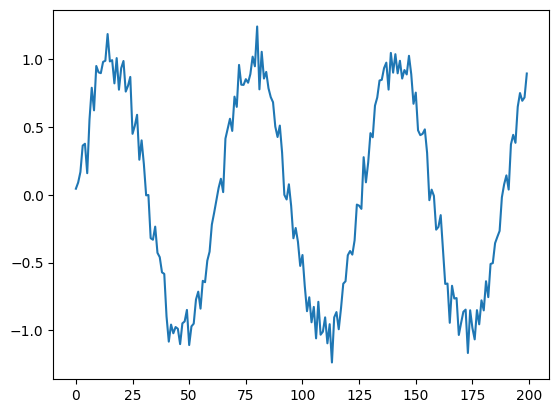

In [2]:
series = np.sin(0.1*np.arange(200))
noise = np.random.randn(200) * 0.1
series = series+ noise
plt.plot(series);

In [3]:
# Costruiamo il dataset dalla serie
T = 12
x = []
y = []
for t in range(len(series) -T):
    piece = series[t:t+T]
    x.append(piece)
    ground_truth = series[t+T]
    y.append(ground_truth)

x = np.array(x).reshape(-1, T)
y = np.array(y).reshape(-1, 1)
N = len(x)

x.shape, y.shape

((188, 12), (188, 1))

In [4]:
# Modello Autoregressivo Lineare
i = Input(shape=(T,))
out = Dense(1)(i)
model = Model(i, out)
model.compile(loss="mse", optimizer=Adam(learning_rate=0.1))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
r = model.fit(
    x[:N//2], y[:N//2], validation_data=(x[N//2:], y[N//2:]), epochs=80)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.4174 - val_loss: 0.1195
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1007 - val_loss: 0.0635
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0877 - val_loss: 0.1127
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1168 - val_loss: 0.0703
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0873 - val_loss: 0.0865
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0734 - val_loss: 0.0442
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0674 - val_loss: 0.0357
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0469 - val_loss: 0.0520
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0653 - val_loss: 0.0584
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0490 - val_loss: 0.0367
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0418 - val_loss: 0.0269
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0332 - val_loss: 0.0289
E

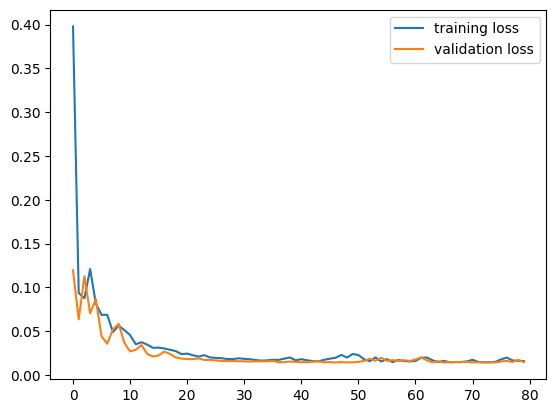

In [6]:
plt.plot(r.history["loss"], label="training loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend();

In [7]:
# Forecasting errato
validation_target = y[N//2:]
predictions = []

i = N//2
while len(predictions) < len(validation_target):
    p = model.predict(x[i].reshape(1, -1), verbose=False)[0, 0]
    predictions.append(p)
    i +=1

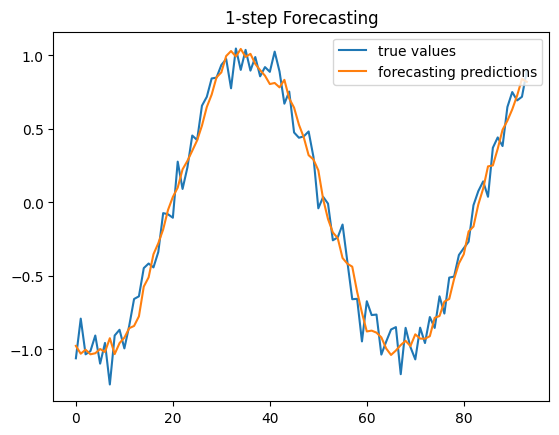

In [8]:
plt.plot(validation_target, label="true values")
plt.plot(predictions, label="forecasting predictions")
plt.title("1-step Forecasting")
plt.legend()

In [9]:
# Forecasting Autoregressivo
validation_target = y[N//2:]
predictions = []

last_x = x[N//2]
while len(predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1), verbose=False)[0, 0]
    predictions.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

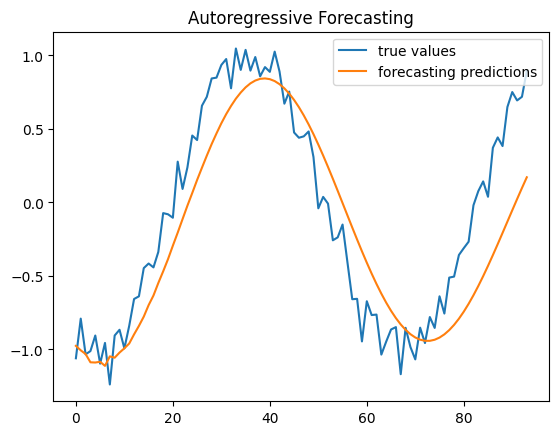

In [10]:
plt.plot(validation_target, label="true values")
plt.plot(predictions, label="forecasting predictions")
plt.title("Autoregressive Forecasting")
plt.legend()